In [208]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D,  Activation
from tensorflow.keras.optimizers import SGD
from PIL import Image
from datasets import load_dataset

Loading and preprocessing data

In [209]:
#fashion, 10 classes, 28x28 images 
ds = load_dataset("zalando-datasets/fashion_mnist") 

In [210]:
train_ds = ds['train'].with_format("np")
test_ds = ds['test'].with_format("np")

train set:  Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})
test set:  Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

 label of image:  9


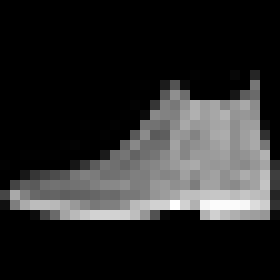

In [211]:
print("train set: ", train_ds)
print("test set: ", test_ds)

#show image and corresponding label
image_0 = Image.fromarray(test_ds["image"][0])
print("\n label of image: ", test_ds["label"][0])
image_0.resize((image_0.width * 10, image_0.height * 10), Image.NEAREST)

In [97]:
#labels

#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

In [212]:
#split train and test data up into separate arrays for image and label
train_images = train_ds['image']
train_labels = train_ds['label']
test_images = test_ds['image']
test_labels = test_ds['label']

In [213]:
#normalize image values from [0,255] to [0,1]
train_images =  (train_images.astype('float32')) * 1/255
test_images  =  (test_images.astype('float32')) * 1/255

In [214]:
# image: 28 x 28 --> vector: 1 x 784
print("(count samples, width, height): ", train_images.shape)
input_dim = train_images.shape[1] * train_images.shape[2]

train_images_flat = train_images.reshape(train_images.shape[0], input_dim)
test_images_flat  = test_images.reshape(test_images.shape[0] , input_dim)

(count samples, width, height):  (60000, 28, 28)


In [215]:
# one-hot encoding, i.e. 
# Number 3 -> [0,0,0,1,0,0,0,0,0]
train_labels = keras.utils.to_categorical(train_labels, 10) 
test_labels  = keras.utils.to_categorical(test_labels, 10) 

### Multilayer Perceptron

Building the model

In [221]:
#architecture
model = Sequential()
model.add(Dense(512, activation = "relu", input_dim = input_dim))
model.add(Dropout(0.25))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax")) #get probability values

# defining optimizer, compile model
model.compile(loss='categorical_crossentropy',
              optimizer = SGD(learning_rate=0.01),
              metrics = ['accuracy'])

Training the model

In [222]:
model.fit(train_images_flat, train_labels,
          epochs = 10, 
          batch_size = 100) 

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5311 - loss: 1.3974
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7579 - loss: 0.7085
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7909 - loss: 0.6097
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8065 - loss: 0.5614
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8201 - loss: 0.5263
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8266 - loss: 0.5031
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8307 - loss: 0.4847
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8377 - loss: 0.4618
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8399 - loss: 0.4574
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8464 - loss: 0.4396


Evaluation

In [223]:
score = model.evaluate(test_images_flat, test_labels, batch_size = 100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8528 - loss: 0.4215


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


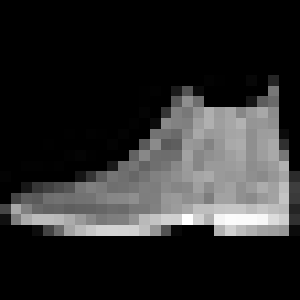

In [224]:
sample = 0
img = Image.fromarray((test_images[sample] * 255).astype("uint8"))

print(model.predict((train_images[sample]*255).reshape(1, 784)))
img.resize((300,300), Image.NEAREST)

### Convolutional Neural Network

architecture

In [227]:
model_cnn = Sequential()

#Convolutional Layers
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))


#MLP (same one as before (except input))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation = "relu"))
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(10, activation = "softmax"))


training

In [230]:
# defining optimizer, compile model
model_cnn.compile(loss='categorical_crossentropy',
              optimizer = SGD(learning_rate=0.01),
              metrics = ['accuracy'])

model_cnn.fit(train_images, train_labels, 
              epochs=10, 
              batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3177 - loss: 1.9125
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6566 - loss: 0.9371
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7125 - loss: 0.7747
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7367 - loss: 0.7101
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7575 - loss: 0.6549
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7706 - loss: 0.6206
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7780 - loss: 0.5947
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7881 - loss: 0.5706
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7917 - loss: 0.5605
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7981 - loss: 0.5535


Evaluation

In [194]:
score = model_cnn.evaluate(test_images, test_labels, batch_size = 100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8327 - loss: 0.4600


In [ ]:
sample = 0
img = Image.fromarray((test_images[sample] * 255).astype("uint8"))

print(model_cnn.predict((train_images[sample]*255).reshape(1, 784)))
img.resize((300,300), Image.NEAREST)

In [44]:
img = train_ds['image'][sample]

In [54]:
sample = 0

resized_image = img.resize((img.width * 10, img.height * 10), Image.NEAREST)
img1 = np.expand_dims(np.array(img), axis=-1)
img1.shape


(28, 28, 1)

In [55]:
print(model_cnn.predict(img1))
resized_image

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 1 for '{{node sequential_8_1/conv2d_15_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_8_1/ExpandDims, sequential_8_1/conv2d_15_1/convolution/ReadVariableOp)' with input shapes: [28,28,1,1], [3,3,1,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)